## output = activation_function( w1*x1 + w2*x2 + ... + wn*xn + bias )

In [57]:
# tensorflow+keras-->production environment

In [58]:
# Full demo (pytorch)

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


## Load & Preprocess Boston Dataset

In [60]:
data = pd.read_csv('../csv/Boston.csv')
# X = data.iloc[:,1:14].values
# y = data['medv'].values.reshape(-1, 1)

x=data.iloc[:,1:13].values
y = data['medv'].values.reshape(-1,1)


In [61]:
# scale
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [62]:
# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [63]:
# -------------------------------------------------------------
# CONVERT TO TENSORS
# PyTorch operations happen on tensors (CPU or GPU).
# -------------------------------------------------------------
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test,  dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test,  dtype=torch.float32)

print("Data loaded and preprocessed.")

Data loaded and preprocessed.


In [64]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(12, 64)
        self.act1   = nn.ReLU()

        self.layer2 = nn.Linear(64, 64)
        self.act2   = nn.ReLU()

        self.out    = nn.Linear(64, 1)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.out(x)
        return x

In [65]:
model = SimpleMLP()
print(model)

SimpleMLP(
  (layer1): Linear(in_features=12, out_features=64, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (act2): ReLU()
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [66]:
# Instantiate Model, Loss, Optimizer
# Loss Function = MSE (Regression)
criterion = nn.MSELoss()

# Optimizer = Adam (Momentum + Adaptive LR)
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

print("\nModel, loss function, and optimizer ready.")


Model, loss function, and optimizer ready.


In [67]:
model.parameters

<bound method Module.parameters of SimpleMLP(
  (layer1): Linear(in_features=12, out_features=64, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (act2): ReLU()
  (out): Linear(in_features=64, out_features=1, bias=True)
)>

In [68]:
# -------------------------------------------------------------
# TRAINING LOOP — THE HEART OF PYTORCH
#
# This is where PyTorch shines:
# ✔ You see the forward pass
# ✔ You see backward pass
# ✔ You see optimizer step
# ✔ You can insert loops or if/else (dynamic graph)
# -------------------------------------------------------------

epochs = 500
train_losses = []
val_losses = []

for epoch in range(epochs):

    # -------------------------------
    # TRAIN MODE (dropout = ON)
    # -------------------------------
    model.train()

    # Forward pass (PyTorch builds computation graph dynamically)
    preds = model(X_train)

    # Compute training loss
    loss = criterion(preds, y_train)

    # Clear old gradients (PyTorch accumulates!)
    optimizer.zero_grad()

    # Backpropagation (computes gradients via chain rule)
    loss.backward()

    # Update weights using optimizer rule (Adam here)
    optimizer.step()

    # -------------------------------
    # VALIDATION (dropout = OFF)
    # -------------------------------
    
    model.eval()
    with torch.no_grad():  # disables autograd (faster)
        val_preds = model(X_test)
        val_loss = criterion(val_preds, y_test)

    # Save losses
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    # Print every 20 epochs
    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

print("\nTraining complete.")
'''Example: print weights after each epoch
if epoch % 20 == 0:
    print("Weights after epoch", epoch)
    print(model.layer1.weight.data)'''

'''
Example: print weights after every batch
for batch_x, batch_y in dataloader:
    preds = model(batch_x)
    loss = criterion(preds, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(model.layer1.weight.data)   # batch-wise update

log gradient magnitudes per epoch
    print(model.layer1.weight.grad)
'''

Epoch 0 | Train Loss: 607.1281 | Val Loss: 521.0318
Epoch 20 | Train Loss: 119.0821 | Val Loss: 85.2872
Epoch 40 | Train Loss: 41.4752 | Val Loss: 36.8286
Epoch 60 | Train Loss: 28.7213 | Val Loss: 29.6590
Epoch 80 | Train Loss: 24.1219 | Val Loss: 26.6095
Epoch 100 | Train Loss: 21.6328 | Val Loss: 24.6809
Epoch 120 | Train Loss: 19.9186 | Val Loss: 23.3873
Epoch 140 | Train Loss: 18.6427 | Val Loss: 22.4077
Epoch 160 | Train Loss: 17.6102 | Val Loss: 21.5831
Epoch 180 | Train Loss: 16.7895 | Val Loss: 20.8889
Epoch 200 | Train Loss: 16.0665 | Val Loss: 20.2829
Epoch 220 | Train Loss: 15.4041 | Val Loss: 19.6366
Epoch 240 | Train Loss: 14.7946 | Val Loss: 19.1491
Epoch 260 | Train Loss: 14.2275 | Val Loss: 18.6781
Epoch 280 | Train Loss: 13.6830 | Val Loss: 18.2661
Epoch 300 | Train Loss: 13.1871 | Val Loss: 17.9333
Epoch 320 | Train Loss: 12.6878 | Val Loss: 17.6703
Epoch 340 | Train Loss: 12.1758 | Val Loss: 17.5071
Epoch 360 | Train Loss: 11.6574 | Val Loss: 17.4227
Epoch 380 | Tra

'\nExample: print weights after every batch\nfor batch_x, batch_y in dataloader:\n    preds = model(batch_x)\n    loss = criterion(preds, batch_y)\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\n    print(model.layer1.weight.data)   # batch-wise update\n\nlog gradient magnitudes per epoch\n    print(model.layer1.weight.grad)\n'

## Plot Training vs Validation Loss

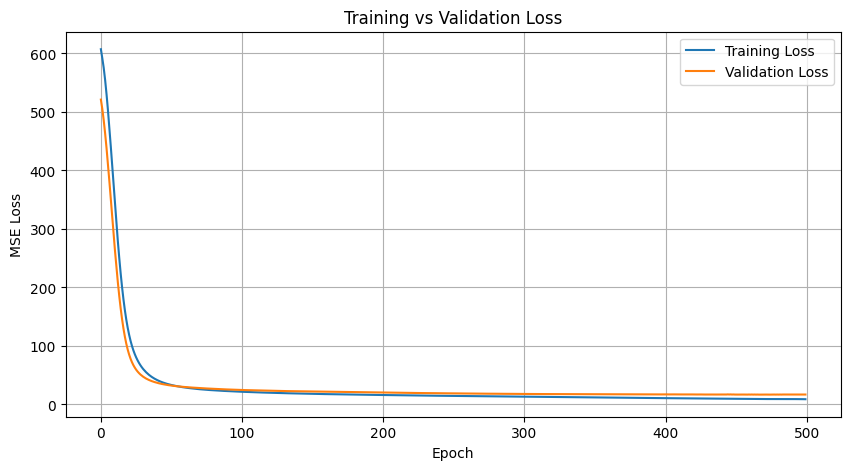

In [69]:
# -------------------------------------------------------------
# LOSS CURVES (Overfitting / Underfitting Check)
# -------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# Interpretation:
# ✔ If both curves go down → learning
# ✔ If train << val → overfitting
# ✔ If both high → underfitting


In [72]:
r2_score(y_test,val_preds)

0.7692573070526123